In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.patches as patches

from skimage.io import imread
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# To stop potential randomness
seed = 42
rng = np.random.RandomState(seed)

In [5]:
data = pd.read_csv('../datasets/blood_cell_detection/blood_cell_detection.csv')

In [6]:
temp = data.loc[data.cell_type == 'WBC'].copy()
data = temp.drop_duplicates(keep=False)

In [7]:
data.head()

,filename,cell_type,xmin,xmax,ymin,ymax
13,0.jpg,WBC,383,625,205,434
31,1.jpg,WBC,247,462,352,480
41,2.jpg,WBC,93,296,1,173
42,3.jpg,WBC,243,388,128,291
57,4.jpg,WBC,150,337,238,426


In [9]:
idx = rng.choice(range(data.shape[0])) 

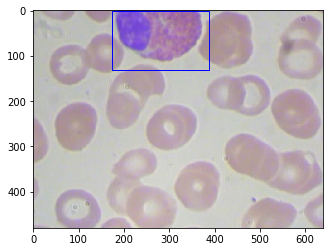

In [12]:
image = imread('../datasets/blood_cell_detection/images/' + data.iloc[idx].filename.split('.')[0] + '.jpg')

fig,ax = plt.subplots(1)
ax.imshow(image)

for _, row in data[data.filename == data.iloc[idx].filename].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    if row.cell_type == 'RBC':
        edgecolor = 'r'
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
    else:
        edgecolor = 'g'
    
    rect = patches.Rectangle((xmin, ymin), width, height, edgecolor=edgecolor, facecolor='none')
    ax.add_patch(rect)
    
plt.show()

In [8]:
image.shape

(480, 640, 3)

In [9]:
row = data[(data.filename == data.iloc[idx].filename) & (data.cell_type == 'WBC')]
row

,filename,cell_type,xmin,xmax,ymin,ymax
1308,99.jpg,WBC,173,387,1,131


In [10]:
image.shape

(480, 640, 3)

In [11]:
patch_1_xmin, patch_1_xmax, patch_1_ymin, patch_1_ymax = 0, 320, 0, 240
patch_2_xmin, patch_2_xmax, patch_2_ymin, patch_2_ymax = 320, 640, 0, 240
patch_3_xmin, patch_3_xmax, patch_3_ymin, patch_3_ymax = 0, 320, 240, 480
patch_4_xmin, patch_4_xmax, patch_4_ymin, patch_4_ymax = 320, 640, 240, 480
patch_5_xmin, patch_5_xmax, patch_5_ymin, patch_5_ymax = 160, 480, 120, 360


patch_1 = image[patch_1_ymin:patch_1_ymax, patch_1_xmin:patch_1_xmax, :]
patch_2 = image[patch_2_ymin:patch_2_ymax, patch_2_xmin:patch_2_xmax, :]
patch_3 = image[patch_3_ymin:patch_3_ymax, patch_3_xmin:patch_3_xmax, :]
patch_4 = image[patch_4_ymin:patch_4_ymax, patch_4_xmin:patch_4_xmax, :]
patch_5 = image[patch_5_ymin:patch_5_ymax, patch_5_xmin:patch_5_xmax, :]

In [12]:
patch_1.shape, patch_2.shape, patch_3.shape, patch_4.shape, patch_5.shape

((240, 320, 3), (240, 320, 3), (240, 320, 3), (240, 320, 3), (240, 320, 3))

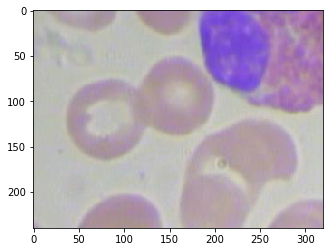

In [13]:
plt.imshow(patch_1) #can we parallely print the original?

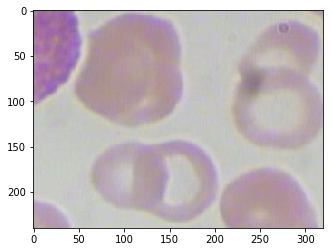

In [14]:
plt.imshow(patch_2)

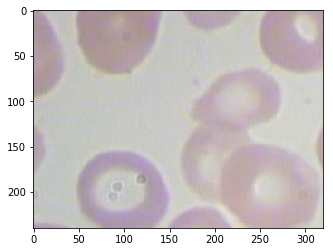

In [15]:
plt.imshow(patch_3)

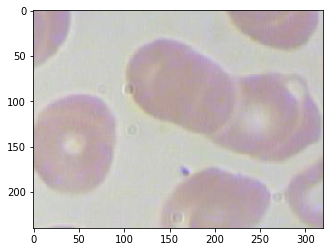

In [16]:
plt.imshow(patch_4)

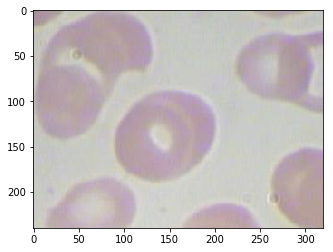

In [17]:
plt.imshow(patch_5)

In [18]:
target_1 = target_2 = target_3 = target_4 = target_5 = Iarea = 0

In [19]:
# for patch_1

Irect_xmin, Irect_ymin = max(row.xmin.values[0], patch_1_xmin), max(row.ymin.values[0], patch_1_ymin)
Irect_xmax, Irect_ymax = min(row.xmax.values[0], patch_1_xmax), min(row.ymax.values[0], patch_1_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_1 = Iarea = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_1_xmax - patch_1_xmin)*(patch_1_ymax - patch_1_ymin)
    
    target_1 = Iarea / Parea 
    target_1 = int(target_1 > 0.1)

In [20]:
target_1

1

In [21]:
# for patch_2

Irect_xmin, Irect_ymin = max(row.xmin.values[0], patch_2_xmin), max(row.ymin.values[0], patch_2_ymin)
Irect_xmax, Irect_ymax = min(row.xmax.values[0], patch_2_xmax), min(row.ymax.values[0], patch_2_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_2 = Iarea = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_2_xmax - patch_2_xmin)*(patch_2_ymax - patch_2_ymin)

    target_2 = Iarea / Parea 
    target_2 = int(target_2 > 0.1)

In [22]:
# for patch_3

Irect_xmin, Irect_ymin = max(row.xmin.values[0], patch_3_xmin), max(row.ymin.values[0], patch_3_ymin)
Irect_xmax, Irect_ymax = min(row.xmax.values[0], patch_3_xmax), min(row.ymax.values[0], patch_3_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_3 = Iarea = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_3_xmax - patch_3_xmin)*(patch_3_ymax - patch_3_ymin)

    target_3 = Iarea / Parea 
    target_3 = int(target_3 > 0.1)

In [23]:
# for patch_4

Irect_xmin, Irect_ymin = max(row.xmin.values[0], patch_4_xmin), max(row.ymin.values[0], patch_4_ymin)
Irect_xmax, Irect_ymax = min(row.xmax.values[0], patch_4_xmax), min(row.ymax.values[0], patch_4_ymax)


if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_4 = Iarea = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_4_xmax - patch_4_xmin)*(patch_4_ymax - patch_4_ymin)

    target_4 = Iarea / Parea 
    target_4 = int(target_4 > 0.1)

In [24]:
# for patch_5

Irect_xmin, Irect_ymin = max(row.xmin.values[0], patch_5_xmin), max(row.ymin.values[0], patch_5_ymin)
Irect_xmax, Irect_ymax = min(row.xmax.values[0], patch_5_xmax), min(row.ymax.values[0], patch_5_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_5 = Iarea = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_5_xmax - patch_5_xmin)*(patch_5_ymax - patch_5_ymin)
    
    target_5 = Iarea / Parea 
    target_5 = int(target_5 > 0.1)

In [25]:
target_1, target_2, target_3, target_4, target_5

(1, 1, 0, 0, 0)

In [26]:
X = []
y = []

for idx, row in data.iterrows():
    # read image
    image = imread('../datasets/blood_cell_detection/images/' + row.filename.split('.')[0] + '.jpg')
    
    # set patch co-ordinates
    patch_1_xmin, patch_1_xmax, patch_1_ymin, patch_1_ymax = 0, 320, 0, 240
    patch_2_xmin, patch_2_xmax, patch_2_ymin, patch_2_ymax = 0, 320, 240, 480
    patch_3_xmin, patch_3_xmax, patch_3_ymin, patch_3_ymax = 320, 640, 0, 240
    patch_4_xmin, patch_4_xmax, patch_4_ymin, patch_4_ymax = 320, 640, 240, 480
    patch_5_xmin, patch_5_xmax, patch_5_ymin, patch_5_ymax = 160, 480, 120, 360

    # extract patches
    patch_1 = image[patch_1_ymin:patch_1_ymax, patch_1_xmin:patch_1_xmax, :]
    patch_2 = image[patch_2_ymin:patch_2_ymax, patch_2_xmin:patch_2_xmax, :]
    patch_3 = image[patch_3_ymin:patch_3_ymax, patch_3_xmin:patch_3_xmax, :]
    patch_4 = image[patch_4_ymin:patch_4_ymax, patch_4_xmin:patch_4_xmax, :]
    patch_5 = image[patch_5_ymin:patch_5_ymax, patch_5_xmin:patch_5_xmax, :]

    # set default values
    target_1 = target_2 = target_3 = target_4 = target_5 = Iarea = 0

    # figure out if the patch contains the object

    ## for patch_1
    Irect_xmin, Irect_ymin = max(row.xmin, patch_1_xmin), max(row.ymin, patch_1_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_1_xmax), min(row.ymax, patch_1_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_1 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_1_xmax - patch_1_xmin)*(patch_1_ymax - patch_1_ymin)
        
        target_1 = Iarea / Parea 
        target_1 = int(target_1 > 0.1)
        
    ## for patch_2
    Irect_xmin, Irect_ymin = max(row.xmin, patch_2_xmin), max(row.ymin, patch_2_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_2_xmax), min(row.ymax, patch_2_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_2 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_2_xmax - patch_2_xmin)*(patch_2_ymax - patch_2_ymin)

        target_2 = Iarea / Parea 
        target_2 = int(target_2 > 0.1)
        
    ## for patch_3
    Irect_xmin, Irect_ymin = max(row.xmin, patch_3_xmin), max(row.ymin, patch_3_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_3_xmax), min(row.ymax, patch_3_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_3 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_3_xmax - patch_3_xmin)*(patch_3_ymax - patch_3_ymin)

        target_3 = Iarea / Parea 
        target_3 = int(target_3 > 0.1)
        
    ## for patch_4
    Irect_xmin, Irect_ymin = max(row.xmin, patch_4_xmin), max(row.ymin, patch_4_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_4_xmax), min(row.ymax, patch_4_ymax)


    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_4 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_4_xmax - patch_4_xmin)*(patch_4_ymax - patch_4_ymin)

        target_4 = Iarea / Parea 
        target_4 = int(target_4 > 0.1)
        
    ## for patch_5
    Irect_xmin, Irect_ymin = max(row.xmin, patch_5_xmin), max(row.ymin, patch_5_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_5_xmax), min(row.ymax, patch_5_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_5 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_5_xmax - patch_5_xmin)*(patch_5_ymax - patch_5_ymin)
        
        target_5 = Iarea / Parea 
        target_5 = int(target_5 > 0.1)
    
    # create final input data
    X.extend([patch_1, patch_2, patch_3, patch_4, patch_5])
    
    # create target data
    y.extend([target_1, target_2, target_3, target_4, target_5])

In [27]:
X = np.stack(X, axis=0)
y = np.array(y)

In [28]:
X_preprocessed = preprocess_input(X)

In [29]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(240, 320, 3))

features_X = model.predict(X_preprocessed)

In [30]:
features_X.shape

(1860, 7, 10, 512)

In [31]:
features_X /= features_X.max()

In [32]:
train_x = features_X.reshape(1860,7*10*512)
train_y = y

In [33]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [34]:
# creating a mlp model
model=Sequential()

model.add(Dense(1000, input_dim=7*10*512, activation='relu'))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
model.add(Dropout(0.4))

model.add(Dense(150,input_dim=500,activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [35]:

model.fit(X_train, Y_train, epochs=10, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1302 samples, validate on 558 samples
Epoch 1/10
1302/1302 [==============================] - 1s 908us/step - loss: 0.7040 - acc: 0.5323 - val_loss: 0.6403 - val_acc: 0.5538
Epoch 2/10
1302/1302 [==============================] - 0s 296us/step - loss: 0.5092 - acc: 0.7765 - val_loss: 0.3896 - val_acc: 0.8530
Epoch 3/10
1302/1302 [==============================] - 0s 314us/step - loss: 0.2420 - acc: 0.9232 - val_loss: 0.4810 - val_acc: 0.8190
Epoch 4/10
1302/1302 [==============================] - 0s 314us/step - loss: 0.1632 - acc: 0.9363 - val_loss: 0.3864 - val_acc: 0.8530
Epoch 5/10
1302/1302 [==============================] - 0s 313us/step - loss: 0.1023 - acc: 0.9662 - val_loss: 0.4126 - val_acc: 0.8602
Epoch 6/10
1302/1302 [==============================] - 0s 308us/step - loss: 0.0669 - acc: 0.9770 - val_loss: 0.4424 - val_acc: 0.8746
Epoch 7/10
1302/1302 [==============================] - 0s 318us/step - loss: 0.0579 - acc: 0.9800 - val_loss: 0.5940 - val_acc: 0.8369
E

In [38]:
predictions = model.predict_classes(X_valid).ravel()
prediction_probabilities = model.predict(X_valid).ravel()
_, valid_x, _, _ = train_test_split(X,train_y,test_size=0.3, random_state=42)

0 % sure that it is WBC


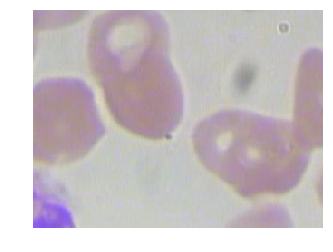

In [53]:
correct_predictions = valid_x[predictions == Y_valid]
index = rng.choice(range(len(correct_predictions)))
img = correct_predictions[index]


prob = (prediction_probabilities[predictions == Y_valid] * 100).astype(int)[index]

print(prob , '% sure that it is WBC')
pylab.imshow(img)
pylab.axis('off')
pylab.show()

In [54]:
for i in range(X.shape[0]):
    if np.array_equal(X[i, :], img):
        break

In [55]:
patch_num = (i % 5) + 1

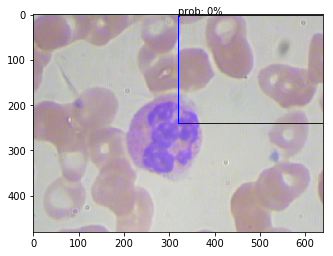

In [56]:
image = imread('../datasets/blood_cell_detection/images/' + data.iloc[int(i / 5)].filename)

fig,ax = plt.subplots(1)
ax.imshow(image)

xmin = eval('patch_' + str(patch_num) + '_xmin')
xmax = eval('patch_' + str(patch_num) + '_xmax')
ymin = eval('patch_' + str(patch_num) + '_ymin')
ymax = eval('patch_' + str(patch_num) + '_ymax')

width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin, ymin), width, height, edgecolor='b', facecolor='none')

ax.annotate(xy=(xmin, ymin), s='prob: ' + str(prob) + "%")
ax.add_patch(rect)
    
plt.show()